## Project 4. Store sales prediction using Neural Networks: Continuation
with functions to speed up the experimenting process

### Code setup

In [1]:
import pandas as pd
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error

In [7]:
# base dataset
df_path  = '../datasets/walmart_sales.csv'
df = pd.read_csv(df_path)

In [3]:
numerical_types = ['int32','int64','float32','float64']

In [15]:
df_eng_path  = '../datasets/walmart_sales_engineered.csv'
df_eng = pd.read_csv(df_eng_path, index_col=0)

In [16]:
df_eng.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,week_number,month,...,weekly_sales_diff,temperature_diff,fuel_price_diff,cpi_diff,unemployment_diff,prev_month,prev_week_number,prev_week_of_month,prev_holiday_flag,holiday_flag_diff
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,...,0.00,0.00,0.000,0.000000,0.0,2.0,5,1.0,0.0,0.0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6,2,...,-1733.46,-3.80,-0.024,0.145812,0.0,2.0,5,1.0,0.0,1.0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,...,-29989.27,1.42,-0.034,0.046973,0.0,2.0,6,2.0,1.0,-1.0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,...,-202240.58,6.70,0.047,0.030500,0.0,2.0,7,3.0,0.0,0.0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9,3,...,145079.09,-0.13,0.064,0.030500,0.0,2.0,8,4.0,0.0,0.0


In [17]:
df_eng.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment', 'week_number', 'month',
       'week_of_month', 'prev_weekly_sales', 'prev_temperature',
       'prev_fuel_price', 'prev_cpi', 'prev_unemployment', 'weekly_sales_diff',
       'temperature_diff', 'fuel_price_diff', 'cpi_diff', 'unemployment_diff',
       'prev_month', 'prev_week_number', 'prev_week_of_month',
       'prev_holiday_flag', 'holiday_flag_diff'],
      dtype='object')

In [18]:
df_eng.dtypes

store                   int64
date                   object
weekly_sales          float64
holiday_flag            int64
temperature           float64
fuel_price            float64
cpi                   float64
unemployment          float64
week_number             int64
month                   int64
week_of_month           int64
prev_weekly_sales     float64
prev_temperature      float64
prev_fuel_price       float64
prev_cpi              float64
prev_unemployment     float64
weekly_sales_diff     float64
temperature_diff      float64
fuel_price_diff       float64
cpi_diff              float64
unemployment_diff     float64
prev_month            float64
prev_week_number        int64
prev_week_of_month    float64
prev_holiday_flag     float64
holiday_flag_diff     float64
dtype: object

### new base df: 'df_eng_proper' (no date, n oweekly_sales_diff)

In [19]:
df_eng_proper = df_eng.drop(['date', 'weekly_sales_diff'], axis=1)

### X and y scaling (separate)

In [38]:
X = df_eng_proper.drop(['weekly_sales'], axis=1)
y = df_eng_proper['weekly_sales']

In [45]:
X_cols = list(X.columns)
y_col = ['weekly_sales']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.75)

In [57]:
scaler_X = MinMaxScaler()
scaler_X.fit(X_train[X_cols])

MinMaxScaler()

In [58]:
scaler_y = MinMaxScaler()
scaler_y.fit(pd.DataFrame(y_train))

MinMaxScaler()

In [59]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [60]:
X_train[X_cols] = scaler_X.transform(X_train[X_cols])
X_test[X_cols] = scaler_X.transform(X_test[X_cols])
y_train[y_col] = scaler_y.transform(y_train[y_col])
y_test = scaler_y.transform(y_test[y_col])

In [61]:
X_train.head()

,store,holiday_flag,temperature,fuel_price,cpi,unemployment,week_number,month,week_of_month,prev_weekly_sales,...,prev_unemployment,temperature_diff,fuel_price_diff,cpi_diff,unemployment_diff,prev_month,prev_week_number,prev_week_of_month,prev_holiday_flag,holiday_flag_diff
1363,0.204545,0.0,0.877907,0.613727,0.030530,0.419590,0.549020,0.545455,0.75,0.440038,...,0.419590,0.568657,0.207598,0.415907,0.648528,0.545455,0.529412,0.50,0.0,0.5
4600,0.727273,0.0,0.967230,0.320641,0.000637,0.538240,0.549020,0.545455,0.75,0.019949,...,0.538240,0.460631,0.510176,0.354225,0.648528,0.545455,0.529412,0.50,0.0,0.5
4530,0.704545,0.0,0.218710,0.397796,0.691557,0.444125,0.960784,1.000000,0.50,0.339011,...,0.444125,0.677254,0.230665,0.565303,0.648528,1.000000,0.941176,0.25,0.0,0.5
4080,0.636364,0.0,0.763742,0.706413,0.097026,0.573510,0.549020,0.545455,0.75,0.083015,...,0.573510,0.568847,0.393487,0.533465,0.648528,0.545455,0.529412,0.50,0.0,0.5
3612,0.568182,0.0,0.323362,0.223948,0.066793,0.409239,0.803922,0.818182,0.75,0.204676,...,0.409239,0.447318,0.374491,0.475049,0.648528,0.818182,0.784314,0.50,0.0,0.5


In [62]:
y_train.head()

,weekly_sales
1363,0.433496
4600,0.011846
4530,0.372996
4080,0.082398
3612,0.195787


### Function to create regression NN models?

### Function to test regression NN models

In [81]:
def test_nn_model(model, X_train, X_test, y_train, y_test,
                  scaler_X, scaler_y,
                  optimizer=keras.optimizers.Adam,
                  metrics = None,
                  loss='mae', lr=0.001, batch_size=256, epochs=25,
                  verbose = False,
                  early_stop=True, lr_schedule=False):
    """
    Trains a NN model that you supply (uncompiled), along with data (X_train, X_test, y_train, y_test)
    and X and y scalers for reverse transform of data for presentation
    ---
    Params:
        model
        X_train
        X_test
        y_train
        y_test
        scaler_X - fitted MinMax (or other used) transformer use on the X data
        scaler_y - fitted MinMax (or other used) transformer use on the y data
        optimizer: tf.keras.optimizer function object (default: tf.keras.optimizers.Adam)
        metrics: list (eg. ['mae'] ?)
        loss: String (default 'mae')
        batch_size: int (default: 256)
        epochs: int (default 25)
        verbose: bool (default: False)
        early_stop: bool (default: True)
        lr_schedule: bool (default: False)
    """
    # prepare the learning rate decay
    # https://stackoverflow.com/questions/61552475/
    # properly-set-up-exponential-decay-of-learning-rate-in-tensorflow
    train_size = X_train.shape[0]
    initial_lr = lr
    final_lr = initial_lr / 100
    lr_decay_factor  = (final_lr / initial_lr) ** (1/epochs)
    steps_per_epoch = int(train_size/batch_size)

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_lr,
                decay_steps=steps_per_epoch,
                decay_rate=lr_decay_factor,
                staircase=True)

    #optimizer
    if lr_schedule == True:
        optim = optimizer(
            learning_rate = lr_schedule
        )
    else:
        optim = optimizer(
            learning_rate = lr
        )

    # model compilation   
    model.compile(
        optimizer = optim,
        loss = loss,
        metrics = metrics
    )
                          
    # prepare early stopping                    
    early_stopping = EarlyStopping(
        min_delta=0.001, # minimium amount of change to count as an improvement
        patience=10, # how many epochs to wait before stopping
        restore_best_weights=True,
    )

    # model training
    if early_stop:
        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            batch_size = batch_size,
            epochs = epochs,
            callbacks = [early_stopping],
            verbose = verbose
        )
    else:
        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            batch_size = batch_size,
            epochs = epochs,
            verbose = verbose
        )

    # convert the training history to a dataframe
    history_df = pd.DataFrame(history.history)
    # use Pandas native plot method
    history_df['loss'].plot();
    history_df['val_loss'].plot();

    # predictions, unscaling etc
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(y_pred))
    print('mae on inv scaled:', mae)

### Model training experimentation

In [69]:
n_features = X_train.shape[1]
n_features

23

In [83]:
model_1 = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[n_features]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

51/51 [==============================] - 0s 960us/step
mae on inv scaled: 48389.936182023004


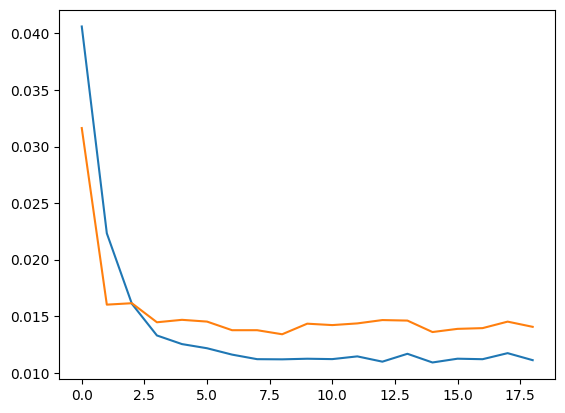

In [87]:
test_nn_model(model_1, X_train, X_test, y_train, y_test,
                  scaler_X, scaler_y,
                  optimizer=keras.optimizers.Adam,
                  metrics = None,
                  loss='mae', lr=0.001, batch_size=512, epochs=50,
                  early_stop=True, lr_schedule=True)

Looking at the previous notebook: We changed nothing but we still got a significantly lower score... what?
Cool, I guess. The scaling is more operable, but mathematically it shouldn't make a difference - apart from the fact that the scaling was done separately on traini Still, now the results are very close to what we were able to achieve with "classical" ML methods, even a little better, when looking at just the MAE score.

#### Explore the predictions further

In [90]:
# predictions, unscaling etc
y_pred = model_1.predict(X_test)
mae = mean_absolute_error(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(y_pred))
print('mae on inv scaled:', mae)

51/51 [==============================] - 0s 2ms/step
mae on inv scaled: 48389.936182023004


In [95]:
X_test['y'] = y_test
X_test['y_pred'] = y_pred
X_test['error'] = abs(X_test['y'] - X_test['y_pred'])

In [96]:
X_test

,store,holiday_flag,temperature,fuel_price,cpi,unemployment,week_number,month,week_of_month,prev_weekly_sales,...,cpi_diff,unemployment_diff,prev_month,prev_week_number,prev_week_of_month,prev_holiday_flag,holiday_flag_diff,y,y_pred,error
839,0.113636,0.0,0.799789,0.437876,0.962811,0.199827,0.470588,0.454545,0.75,0.402694,...,0.455052,0.648528,0.454545,0.450980,0.50,0.0,0.5,0.390247,0.386412,0.003836
928,0.136364,0.0,0.504863,0.632766,0.660529,0.451984,0.431373,0.454545,0.25,0.093432,...,0.397127,0.648528,0.454545,0.411765,0.00,0.0,0.5,0.113923,0.096112,0.017811
850,0.113636,1.0,0.854017,0.630261,0.969207,0.171459,0.686275,0.727273,0.25,0.384472,...,0.605608,0.648528,0.636364,0.666667,1.00,0.0,1.0,0.387422,0.365094,0.022328
3768,0.590909,0.0,0.259937,0.460421,0.107047,0.378378,0.039216,0.000000,0.75,0.371783,...,0.523007,0.648528,0.000000,0.019608,0.50,0.0,0.5,0.362192,0.349023,0.013170
3007,0.477273,0.0,0.330655,0.147295,0.094053,0.422082,0.156863,0.181818,0.00,0.193937,...,0.475047,0.648528,0.090909,0.137255,0.75,0.0,0.5,0.221469,0.226086,0.004617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,0.454545,0.0,0.606977,0.658818,0.938234,0.304581,0.215686,0.181818,0.75,0.156705,...,0.508627,0.648528,0.181818,0.196078,0.50,0.0,0.5,0.144033,0.152463,0.008430
1024,0.159091,0.0,0.760571,0.075651,0.874336,0.233468,0.529412,0.545455,0.50,0.178622,...,0.374337,0.648528,0.545455,0.509804,0.25,0.0,0.5,0.176974,0.175439,0.001535
1378,0.204545,0.0,0.666279,0.679359,0.037003,0.382883,0.843137,0.909091,0.00,0.439117,...,0.407199,0.648528,0.818182,0.823529,1.00,0.0,0.5,0.469546,0.445542,0.024004
2701,0.409091,0.0,0.714905,0.609719,0.120656,0.413456,0.529412,0.545455,0.50,0.378759,...,0.442309,0.648528,0.545455,0.509804,0.25,0.0,0.5,0.308076,0.359678,0.051602


In [110]:
X_test_rescaled = X_test.copy()

In [111]:
X_test_rescaled[X_cols] = scaler_X.inverse_transform(X_test[X_cols])
X_test_rescaled['y'] = scaler_y.inverse_transform(pd.DataFrame(X_test['y']))[:,0]
X_test_rescaled['y_pred'] = scaler_y.inverse_transform(pd.DataFrame(X_test['y_pred']))[:,0]
X_test_rescaled['error'] = abs(X_test_rescaled['y'] - X_test_rescaled['y_pred'])

In [114]:
X_test_rescaled.sort_values(['error'], ascending=False).head(5)

,store,holiday_flag,temperature,fuel_price,cpi,unemployment,week_number,month,week_of_month,prev_weekly_sales,...,cpi_diff,unemployment_diff,prev_month,prev_week_number,prev_week_of_month,prev_holiday_flag,holiday_flag_diff,y,y_pred,error
1941,14.0,0.0,70.63,3.703,186.618927,8.625,35.0,9.0,1.0,2273470.62,...,0.054810,0.0,8.0,34.0,4.0,0.0,0.0,1750891.47,2360970.000,610078.530
4956,35.0,1.0,47.88,3.492,140.421786,8.745,47.0,11.0,4.0,820964.10,...,0.009000,0.0,11.0,46.0,3.0,0.0,1.0,1733822.40,1182067.000,551755.400
1381,10.0,1.0,60.68,3.760,129.836400,7.874,47.0,11.0,4.0,1869087.85,...,0.009567,0.0,11.0,46.0,3.0,0.0,1.0,2950198.64,2497375.500,452823.140
4905,35.0,0.0,41.81,3.046,136.607571,8.763,48.0,12.0,1.0,1781866.98,...,-0.082000,0.0,11.0,47.0,4.0,1.0,-1.0,982598.88,1389635.125,407036.245
1973,14.0,0.0,51.83,4.044,190.759596,8.567,15.0,4.0,3.0,2376022.26,...,0.074425,0.0,4.0,14.0,2.0,0.0,0.0,1912909.69,2248092.000,335182.310


In [115]:
X_test_rescaled.sort_values(['error'], ascending=False).tail(5)

,store,holiday_flag,temperature,fuel_price,cpi,unemployment,week_number,month,week_of_month,prev_weekly_sales,...,cpi_diff,unemployment_diff,prev_month,prev_week_number,prev_week_of_month,prev_holiday_flag,holiday_flag_diff,y,y_pred,error
4139,29.0,1.0,73.30,3.921,138.472936,9.419,36.0,9.0,2.0,545844.91,...,0.095742,0.0,8.0,35.0,5.0,0.0,1.0,540811.85,5.406347e+05,177.1625
1839,13.0,0.0,65.97,3.756,130.829533,5.965,24.0,6.0,3.0,2182437.90,...,-0.060144,0.0,6.0,23.0,2.0,0.0,0.0,2152229.11,2.152056e+06,173.3600
1122,8.0,0.0,78.31,3.501,225.300865,5.679,22.0,6.0,1.0,895157.44,...,0.000287,0.0,5.0,21.0,4.0,0.0,0.0,921161.20,9.213024e+05,141.1750
327,3.0,0.0,57.72,2.771,215.207452,7.564,46.0,11.0,3.0,386635.03,...,-0.118174,0.0,11.0,45.0,2.0,0.0,0.0,372545.32,3.726641e+05,118.7425
2924,21.0,0.0,70.19,3.810,215.277268,7.931,17.0,4.0,5.0,801302.01,...,0.167603,0.0,4.0,16.0,4.0,0.0,0.0,783250.75,7.833262e+05,75.5000


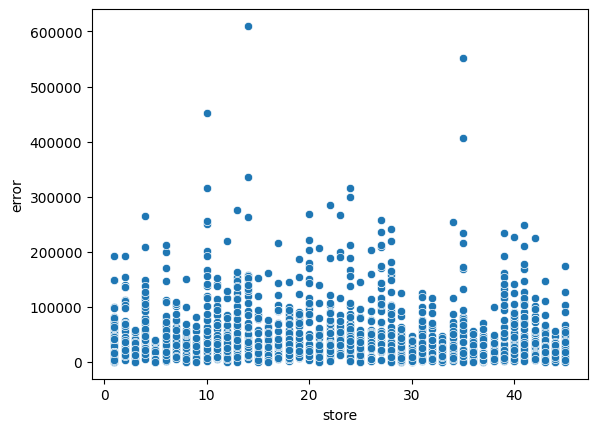

In [116]:
fig = sns.scatterplot(data=X_test_rescaled, x='store', y='error')

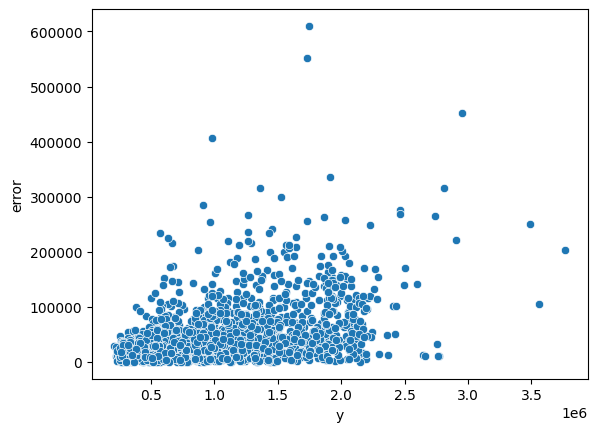

In [117]:
fig = sns.scatterplot(data=X_test_rescaled, x='y', y='error')

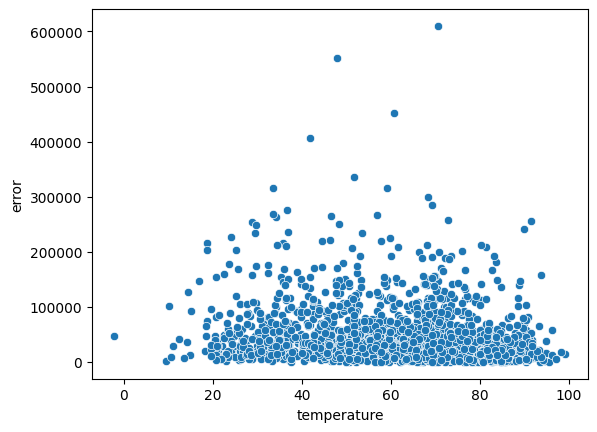

In [118]:
fig = sns.scatterplot(data=X_test_rescaled, x='temperature', y='error')

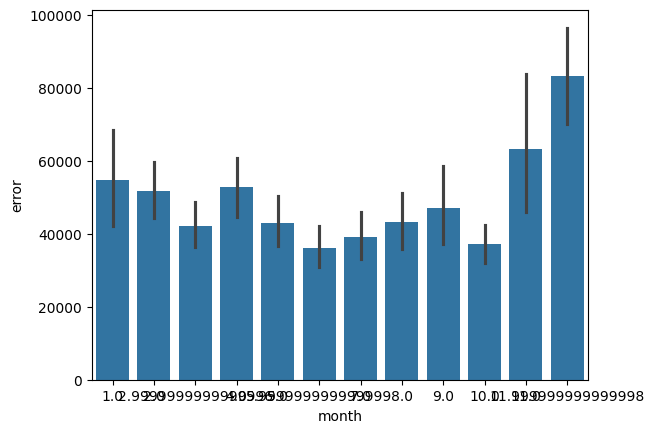

In [119]:
fig = sns.barplot(data=X_test_rescaled, x='month', y='error')